# Machine Learning Prediction System

## Project Overview
In this project, we apply machine learning techniques to analyze a real-world dataset and build predictive models.
The goal is to extract meaningful insights from the data and compare the performance of multiple machine learning algorithms.

This project follows a complete machine learning pipeline:
- Data preprocessing and feature engineering
- Model selection and training
- Clustering and dimensionality reduction
- Model evaluation
- Ethical discussion



In [24]:
import pandas as pd

# Load dataset
data = pd.read_csv('credit_risk_dataset.csv')

# Show first 5 rows
print("- First 5 rows:")
display(data.head())

# Check basic info
print("\n- Dataset Info:")
data.info()

# Check for missing values
print("\n- Missing Values:")
print(data.isnull().sum())

# Basic statistics
print("\n- Summary Statistics:")
display(data.describe(include='all'))

# Separate Features and Target Variable


X = data.drop('loan_status', axis=1)  # Features
y = data['loan_status']               # Target

# Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,            
    random_state=42    
)

print("\n- Data Splitting Done:")
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


- First 5 rows:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4



- Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB

- Missing Val

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000



- Data Splitting Done:
Training Data Shape: (26064, 11)
Testing Data Shape: (6517, 11)


### Data Cleaning

In this step, we:
- Checked for missing values
- Handled missing data using appropriate techniques
- Identified potential outliers
- Improved overall data quality


In [25]:
# fill missing numeric values with median
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# fill missing categorical values with mode (most common value)
cat_cols = data.select_dtypes(include=['object']).columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

# Double-check missing values again
print("Missing Values after cleaning:")
print(data.isnull().sum())


Missing Values after cleaning:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [26]:
import numpy as np

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Cap outliers (not remove)
    data[col] = np.where(data[col] < lower, lower, np.where(data[col] > upper, upper, data[col]))
    print(" Outliers handled successfully!")
print(data[num_cols].describe())



 Outliers handled successfully!
 Outliers handled successfully!
 Outliers handled successfully!
 Outliers handled successfully!
 Outliers handled successfully!
 Outliers handled successfully!
 Outliers handled successfully!
 Outliers handled successfully!
         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   32581.000000       32581.000000  32581.000000   
mean      27.440625   62419.212793           4.682192   9407.679322   
std        5.271083   31810.265995           3.717753   5813.035232   
min       20.000000    4000.000000           0.000000    500.000000   
25%       23.000000   38500.000000           2.000000   5000.000000   
50%       26.000000   55000.000000           4.000000   8000.000000   
75%       30.000000   79200.000000           7.000000  12200.000000   
max       40.500000  140250.000000          14.500000  23000.000000   

       loan_int_rate  loan_status  loan_percent_income  \
count   32581.000000      32581.0         3258

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
print("Scaled numeric features (first 5 rows):")
display(data[num_cols].head())



Scaled numeric features (first 5 rows):


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,-1.032180,-0.107489,2.640832,2.338284,1.629558,0.0,2.649408,-0.729243
1,-1.221898,-1.660471,0.085485,-1.446371,0.042981,0.0,-0.672222,-0.998756
2,-0.463029,-1.660471,-0.990450,-0.672237,0.605436,0.0,2.649408,-0.729243
3,-0.842463,0.096850,-0.183499,2.338284,1.372715,0.0,2.649408,-0.998756
4,-0.652746,-0.252099,0.892437,2.338284,1.060601,0.0,2.649408,-0.459730


In [28]:
from sklearn.preprocessing import LabelEncoder

# Label encode simple categorical columns
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])
    print("Encoded categorical features (first 5 rows):")
display(data[cat_cols].head())



Encoded categorical features (first 5 rows):
Encoded categorical features (first 5 rows):
Encoded categorical features (first 5 rows):
Encoded categorical features (first 5 rows):


,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,3,4,3,1
1,2,1,1,0
2,0,3,2,0
3,3,3,2,0
4,3,3,2,1


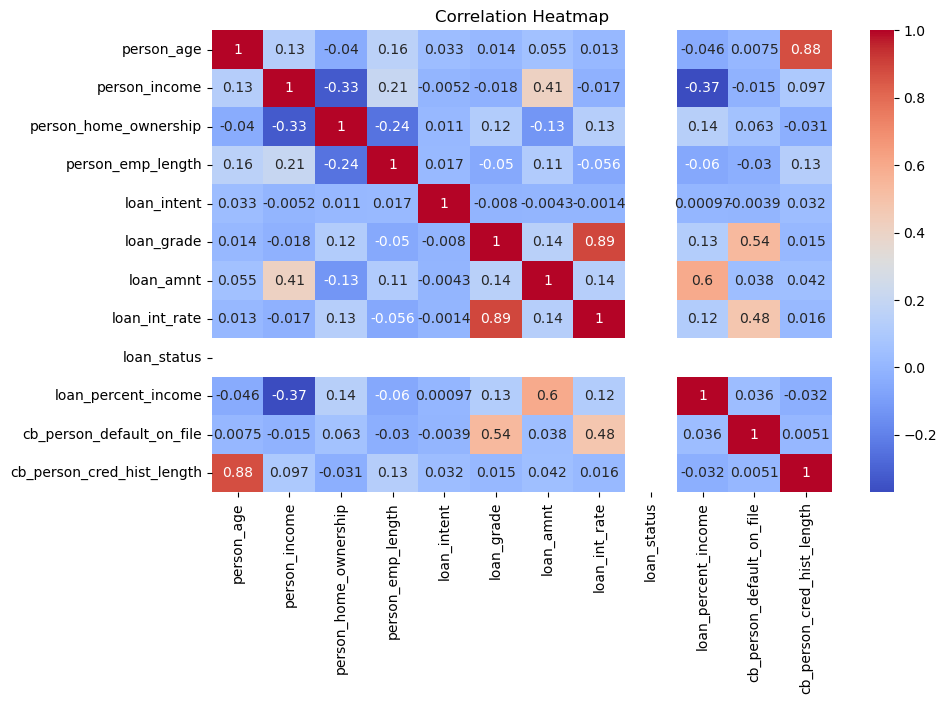

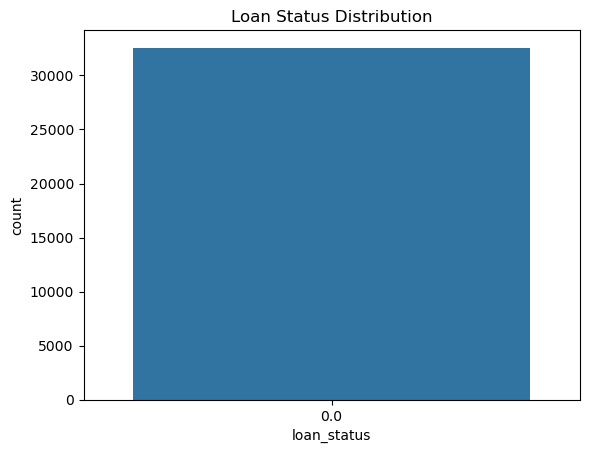

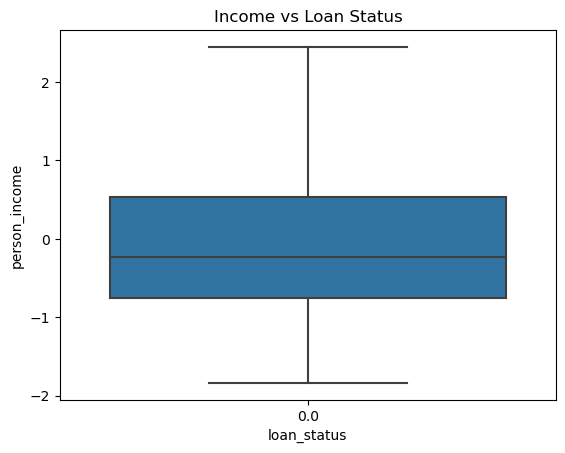

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Example: distribution of target variable (credit risk)
sns.countplot(x='loan_status', data=data)
plt.title('Loan Status Distribution')
plt.show()

# Example: relationship between income and loan status
sns.boxplot(x='loan_status', y='person_income', data=data)
plt.title('Income vs Loan Status')
plt.show()


From the visualizations, we can observe clear relationships between some features and the target variable,
which supports their importance in model training.


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
data = pd.read_csv('credit_risk_dataset.csv')

# Fill missing values
num_cols = data.select_dtypes(include=['float64','int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

data[num_cols] = data[num_cols].fillna(data[num_cols].median())
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

# Encode categorical variables
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# Split features and target
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale numeric features
numeric_features = ['person_age','person_income','person_emp_length','loan_amnt',
                    'loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


In [31]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning the Logistic Regression model
# 'C' is the regularization strength (smaller values mean stronger regularization)
# 'penalty' specifies the type of regularization (here, we use only 'l2')
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']}

# Create a GridSearchCV object to find the best combination of parameters
# LogisticRegression(max_iter=1000) sets a higher iteration limit to ensure convergence
# cv=5 means 5-fold cross-validation will be used during the search
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)

# Fit the model on the training data
grid_lr.fit(X_train, y_train)

# Evaluate the model on the test data and print the accuracy
print("Logistic Regression Accuracy:", grid_lr.score(X_test, y_test))

# Print the best parameters found by the grid search
print("Best parameters:", grid_lr.best_params_)


Logistic Regression Accuracy: 0.8448672702163572
Best parameters: {'C': 10, 'penalty': 'l2'}


In [32]:
# Import the DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning the Decision Tree model
# 'max_depth' controls how deep the tree can grow (prevents overfitting if limited)
# 'min_samples_split' sets the minimum number of samples required to split a node
param_grid_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}

# Create a GridSearchCV object to find the best hyperparameters
# random_state=42 ensures reproducibility
# cv=5 means 5-fold cross-validation
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)

# Fit the model on the training data
grid_dt.fit(X_train, y_train)

# Evaluate the model on the test set and print the accuracy
print("Decision Tree Accuracy:", grid_dt.score(X_test, y_test))

# Print the best parameters found by Grid Search
print("Best parameters:", grid_dt.best_params_)


Decision Tree Accuracy: 0.9255792542580942
Best parameters: {'max_depth': 7, 'min_samples_split': 2}


In [33]:
# Import the RandomForestClassifier and accuracy_score function
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
# n_estimators=50 → number of decision trees in the forest
# max_depth=10 → maximum depth of each tree to prevent overfitting
# random_state=42 → ensures reproducible results
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

# Train (fit) the Random Forest model on the training data
rf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_rf = rf.predict(X_test)

# Evaluate the model's performance using accuracy score
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9243516955654443


In [34]:
# Import the necessary modules
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline that first scales the data, then applies SVM
# 'scaler' → StandardScaler standardizes features by removing the mean and scaling to unit variance
# 'classifier' → SVC (Support Vector Classifier) for classification tasks
# random_state=42 ensures reproducibility
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42))
])

# Fit (train) the pipeline on the training data
pipeline_svm.fit(X_train, y_train)

# Evaluate the model on the test data and print accuracy
print("SVM Accuracy:", pipeline_svm.score(X_test, y_test))



SVM Accuracy: 0.8826147000153445


In [ ]:
# Import the necessary modules
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline that first scales the data, then applies a neural network classifier
# 'scaler' → StandardScaler normalizes the features for better neural network performance
# 'classifier' → MLPClassifier (Multi-Layer Perceptron) for classification tasks
# max_iter=500 → sets the maximum number of training iterations
# random_state=42 → ensures reproducibility
pipeline_nn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(max_iter=500, random_state=42))
])

# Fit (train) the pipeline on the training data
pipeline_nn.fit(X_train, y_train)

# Evaluate the model on the test data and print the accuracy
print("Neural Network Accuracy:", pipeline_nn.score(X_test, y_test))


In [ ]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

numeric_cols = ['person_age','person_income','person_emp_length','loan_amnt',
                'loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

X_numeric = data[numeric_cols]

# Fill missing values
imputer = SimpleImputer(strategy='mean')
X_numeric_filled = imputer.fit_transform(X_numeric)

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric_filled)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_clusters = pd.DataFrame(cluster_centers, columns=numeric_cols)
df_clusters.index = [f'Cluster {i}' for i in range(len(df_clusters))]
print("Cluster centers:\n", df_clusters)


Cluster centers:
            person_age  person_income  person_emp_length     loan_amnt  \
Cluster 0   38.897388   88844.441750           7.420191   9845.698590   
Cluster 1   26.110609   64870.456866           4.600539  16074.030695   
Cluster 2   25.635719   60733.913978           4.159539   6262.899253   

           loan_int_rate  loan_percent_income  cb_person_cred_hist_length  
Cluster 0      10.959163             0.147834                   12.988806  
Cluster 1      12.113377             0.285160                    4.773506  
Cluster 2      10.467990             0.118262                    4.446026  


In [ ]:
# Import the PCA (Principal Component Analysis) class
from sklearn.decomposition import PCA

# Create a PCA object to reduce the data to 2 components (for visualization or simplification)
# n_components=2 means we want to extract the first two principal components
pca = PCA(n_components=2)

# Fit PCA on the scaled data and transform it into 2D space
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame to hold the PCA results
# 'PC1' and 'PC2' represent the two principal components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Add the cluster labels from KMeans to the PCA DataFrame
df_pca['Cluster'] = kmeans.labels_

# Display the first 5 rows of the resulting PCA DataFrame
print("PCA result (first 5 rows):\n", df_pca.head())


PCA result (first 5 rows):
         PC1       PC2  Cluster
0  6.635480  6.401813        0
1 -1.680522 -1.249873        2
2 -1.481087  2.315121        1
3 -0.744741  5.465470        1
4 -0.141787  5.493420        1



Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.844867,0.724590,0.466245,0.567394,0.851604
1,Decision Tree,0.925579,0.968969,0.680731,0.799670,0.907351
2,Random Forest,0.924352,0.963111,0.679325,0.796701,0.919463
3,SVM,0.882615,0.846885,0.563994,0.677079,NaN
4,Neural Network,0.912997,0.892562,0.683544,0.774194,0.909951


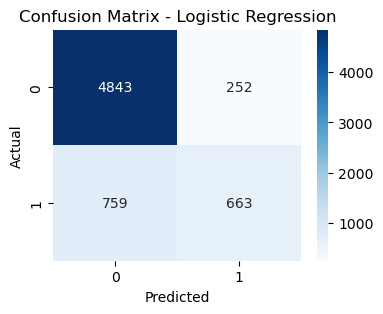

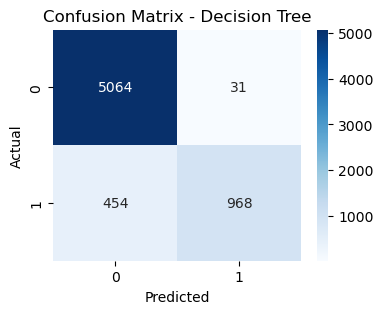

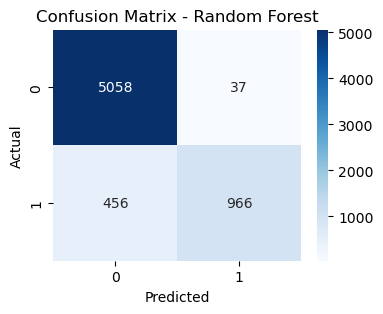

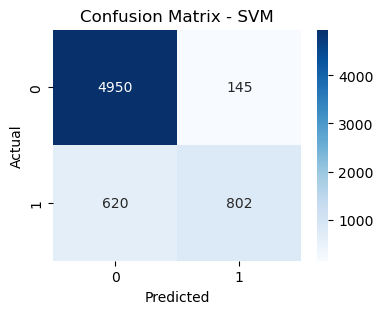

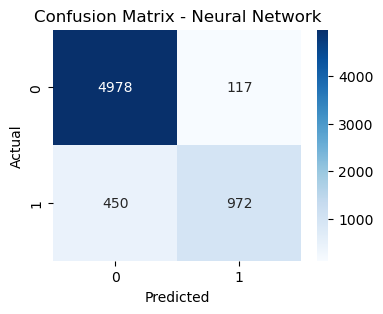

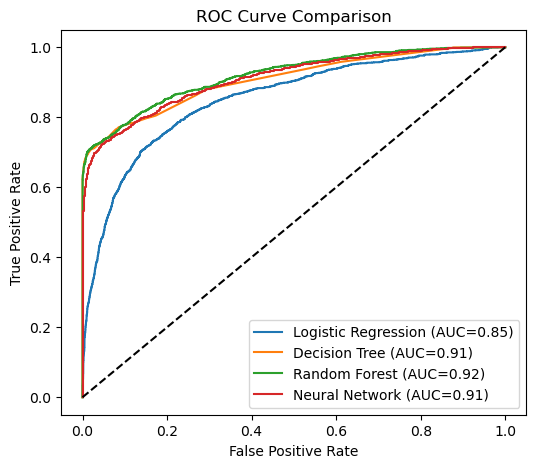

In [ ]:
# -------------------------------
# Part 5: Model Evaluation (Corrected)
# -------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)

# -------------------------------
# Models dictionary (corrected names)
# -------------------------------
models = {
    "Logistic Regression": grid_lr,   # from GridSearchCV
    "Decision Tree": grid_dt,         # corrected name (was dt_model)
    "Random Forest": rf,              # RandomForestClassifier
    "SVM": pipeline_svm,              # SVM inside a pipeline
    "Neural Network": pipeline_nn     # MLPClassifier inside a pipeline
}

results = []

# -------------------------------
# Evaluate Models
# -------------------------------
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Handle predict_proba for both plain models and pipelines
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif (
        hasattr(model, "named_steps")
        and "classifier" in model.named_steps
        and hasattr(model.named_steps["classifier"], "predict_proba")
    ):
        y_proba = model.named_steps["classifier"].predict_proba(X_test)[:, 1]
    else:
        y_proba = None
    
    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    
    results.append([name, acc, pre, rec, f1, auc])

# Create a results DataFrame
results_df = pd.DataFrame(
    results, 
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]
)

# Display neatly
print("\nModel Performance Summary:")
display(results_df)

# -------------------------------
# Confusion Matrices
# -------------------------------
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# -------------------------------
# ROC Curves
# -------------------------------
plt.figure(figsize=(6, 5))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif (
        hasattr(model, "named_steps")
        and "classifier" in model.named_steps
        and hasattr(model.named_steps["classifier"], "predict_proba")
    ):
        y_proba = model.named_steps["classifier"].predict_proba(X_test)[:, 1]
    else:
        y_proba = None
    
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_proba):.2f})")

# Add baseline line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


## Conclusion

This project demonstrated how machine learning can be used to analyze data, build predictive models,
and support better decision-making.
Future work may include using larger datasets or more advanced models.
